In [6]:
%matplotlib inline

In [1]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_harris,
                             corner_peaks, ORB, plot_matches)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

## Possible preprocessing/indexing methods:
- LESH (Local Energy based Shape Histogram) https://en.wikipedia.org/wiki/LESH
- ORB feature detector and binary descriptor http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html#example-features-detection-plot-orb-py

## Other resources
- https://www.robots.ox.ac.uk/~vgg/publications/1992/Rothwell92a/rothwell92a.pdf
- Generalized Shape Autocorrelation (http://www.aaai.org/Papers/AAAI/1990/AAAI90-159.pdf)
- Geometric Hashing (http://www.cs.utexas.edu/~grauman/courses/spring2007/395T/papers/Lamdan88.pdf)

In [2]:
# Example from scikit-learn that we can use
# (http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_orb.html#example-features-detection-plot-orb-py)
# but i really dont know what is this yet :)))

In [3]:
img1 = rgb2gray(data.astronaut())
img2 = tf.rotate(img1, 180)
tform = tf.AffineTransform(scale=(1.3, 1.1), rotation=0.5,
                           translation=(0, -200))
img3 = tf.warp(img1, tform)

In [4]:
descriptor_extractor = ORB(n_keypoints=200)

descriptor_extractor.detect_and_extract(img1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img2)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(img3)
keypoints3 = descriptor_extractor.keypoints
descriptors3 = descriptor_extractor.descriptors

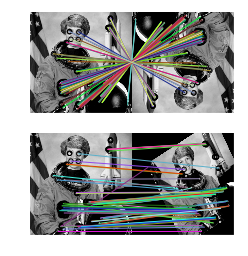

In [7]:
matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()